# Histrogram

### Perform the follwing
### 1. Histogram plotting
### 2. Perform Linear stretching
### 3. Perform Histogram Equalisation
### 4. Perform Histogram Matching


In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import NoNorm


# Histogram
#### Use image rose.jpg

#  Syntax
#  calcHist(sourceimage, channels, mask, histSize/bins, ranges )

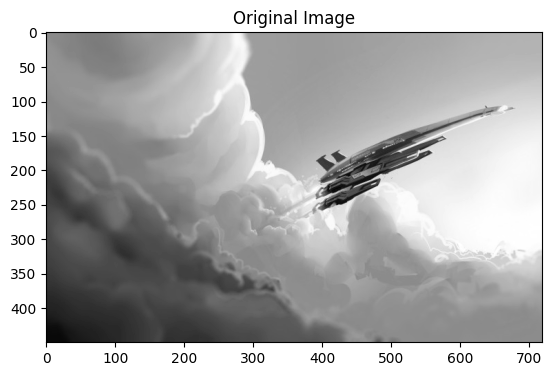

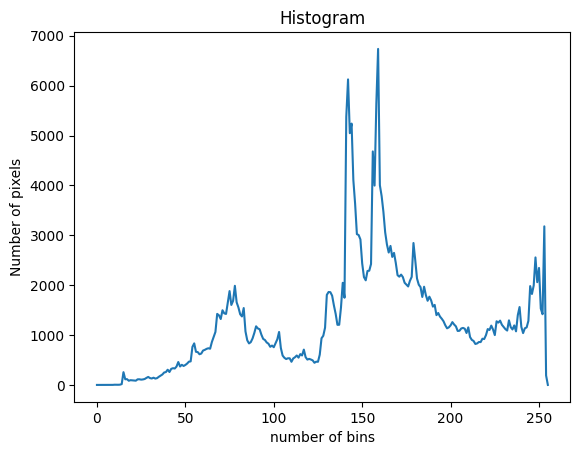

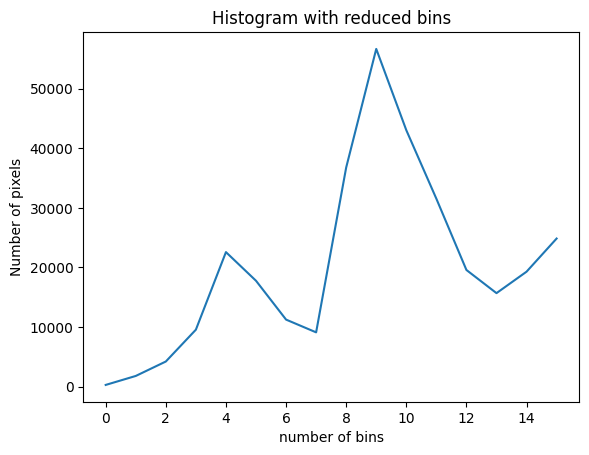

In [78]:
# reads an input image
path = r"C:\Users\hpary\OneDrive\Documents\CV\images\sr2.jpg"

img = cv2.imread(path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

# find frequency of pixels in range 0-255, with 256 bins
histr = cv2.calcHist([gray],[0],None,[256],[0,255])


histr1 = cv2.calcHist([gray],[0],None,[16],[0,255])

# show the plotting graph of an image
plt.plot(histr)
plt.xlabel('number of bins')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

plt.plot(histr1)
plt.xlabel('number of bins')
plt.ylabel('Number of pixels')
plt.title('Histogram with reduced bins')

plt.show()

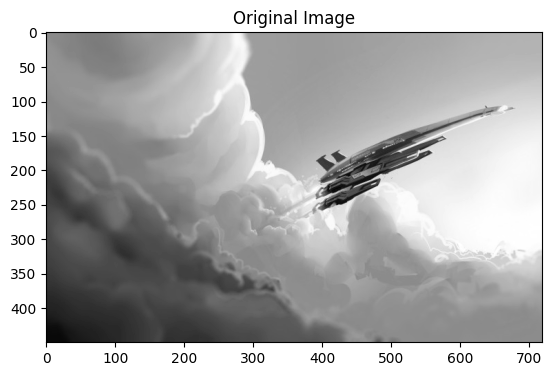

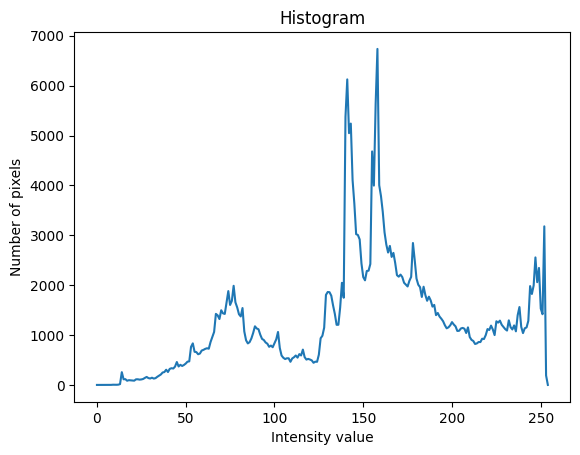

In [79]:
# reads an input image
img = cv2.imread(path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

# find frequency of pixels in range 0-255
histr = cv2.calcHist([gray],[0],None,[255],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.xlabel('Intensity value')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

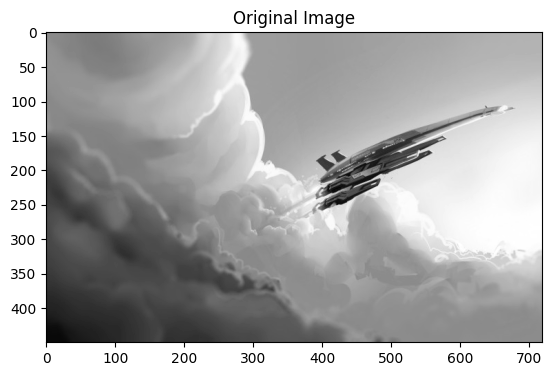

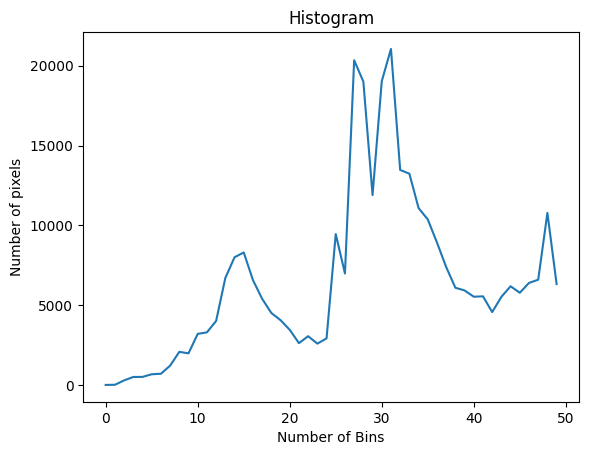

In [80]:
# reads an input image
img = cv2.imread(path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

# find frequency of pixels in range 0-255
histr = cv2.calcHist([gray],[0],None,[50],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.xlabel('Number of Bins')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

# Color Histogram
#### Use image colorRose.jpg

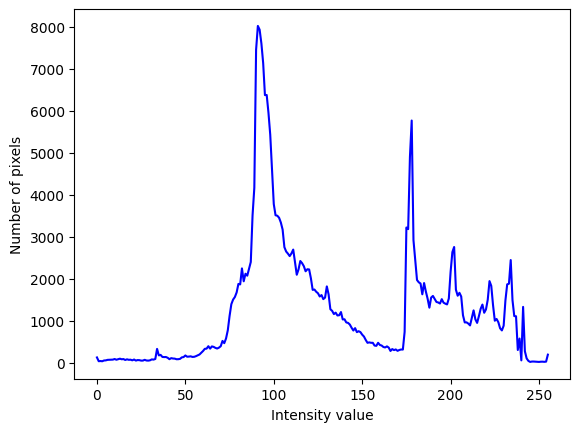

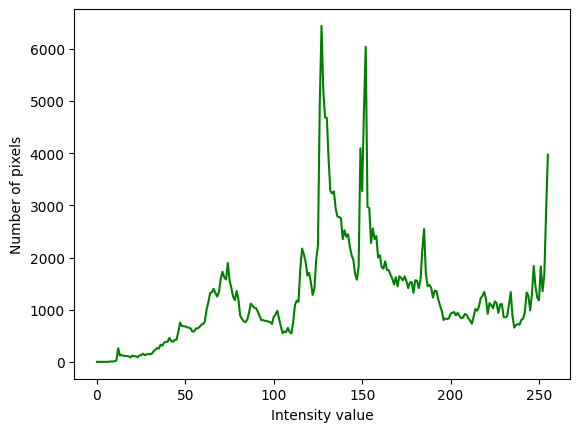

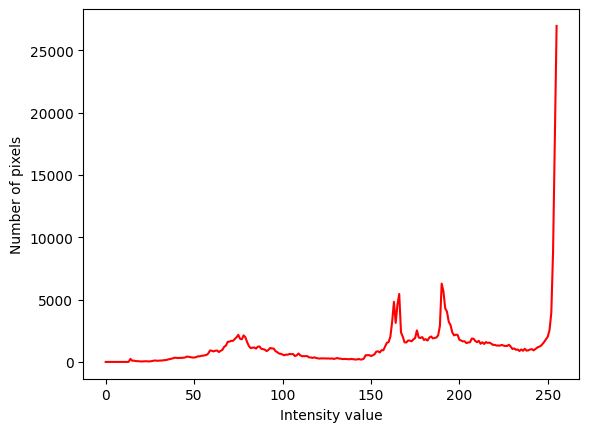

In [81]:
img = cv2.imread(path)
color = ('b','g','r')


'''
#hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))
'''

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)

    plt.xlabel('Intensity value')
    plt.ylabel('Number of pixels')
    plt.show()

# Linear Stretching
#### Use image woods.jpg

Text(0.5, 1.0, 'Original Image')

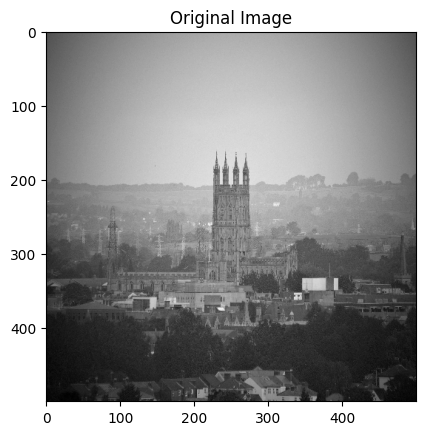

In [82]:
# reads an input image
img = cv2.imread(r"images\low contrast.jpg")
img = cv2.resize(img, (500,500))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Original Image without normalization')

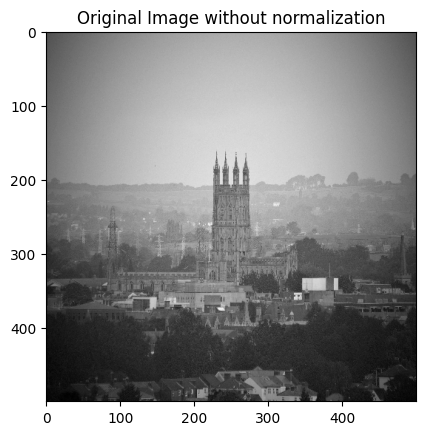

In [83]:
plt.imshow(gray,cmap ='gray')
plt.title('Original Image without normalization')

In [84]:
gray.shape

(500, 500)

Text(0.5, 1.0, 'Original Image Histogram')

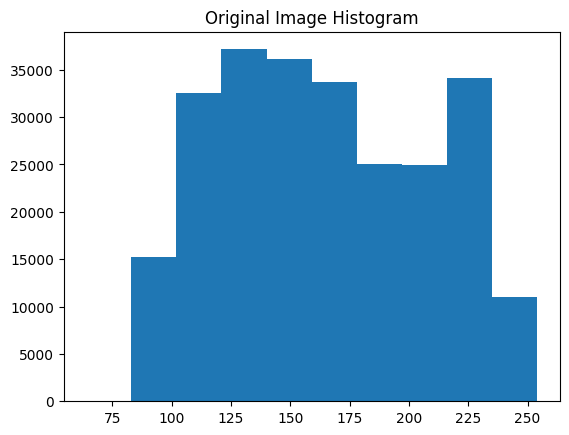

In [85]:
plt.hist(gray.flatten()*255)
plt.title('Original Image Histogram')

In [86]:
gray.min()

2

In [87]:
gray.max()

192

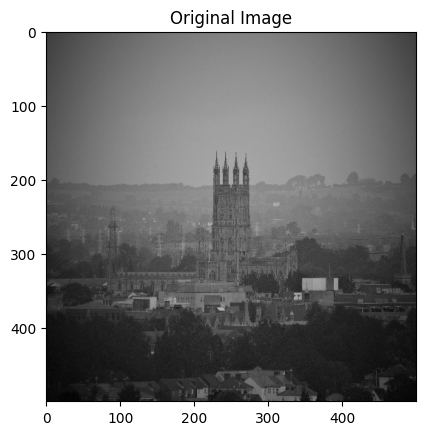

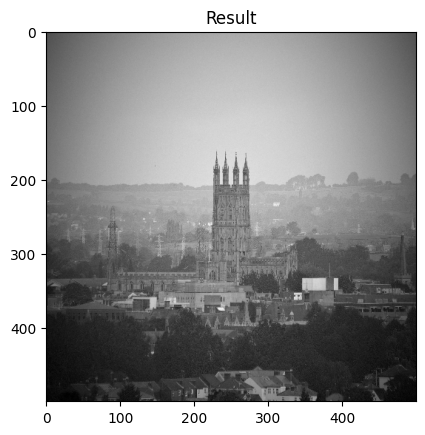

Text(0.5, 1.0, 'Original Image Histogram')

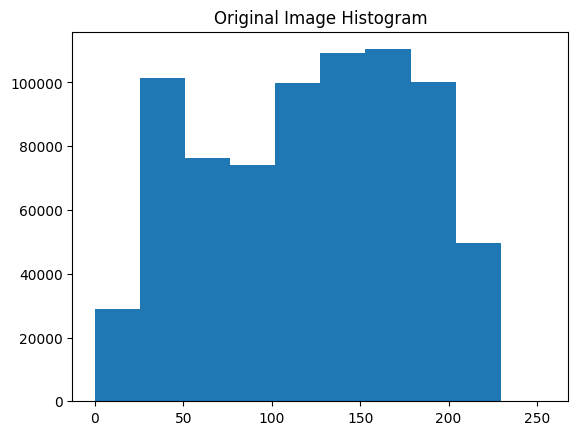

In [88]:

def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

plt.imshow(img.astype('uint8'))  # function is used to cast a pandas object to a specified data type
plt.title('Original Image')
plt.show()
# Define parameters.
r1 = 2
s1 = 0
r2 = 192
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
linear_stretched = pixelVal_vec(img, r1, s1, r2, s2)

plt.imshow(linear_stretched.astype('uint8'))
plt.title('Result')
plt.show()


plt.hist(linear_stretched.flatten())
plt.title('Original Image Histogram')

# Histogram Equalisation
#### Use image nature.jpg

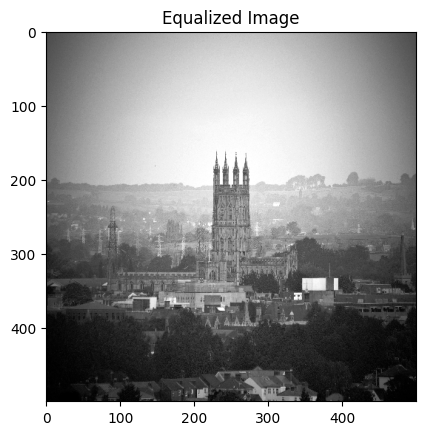

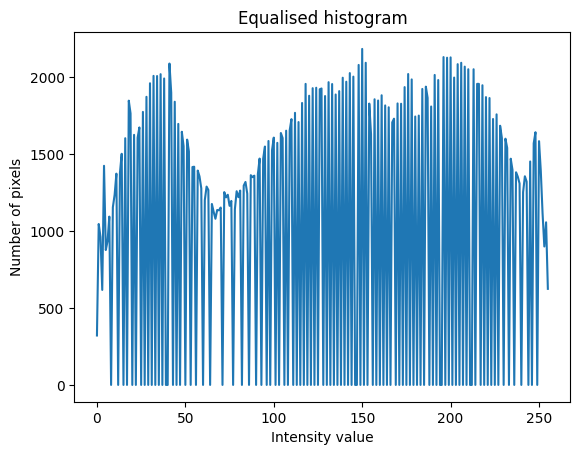

In [89]:

#Apply histogram equalization
equl = cv2.equalizeHist(gray)
plt.imshow(equl,'gray')
plt.title('Equalized Image')
plt.show()

histr2 = cv2.calcHist([equl],[0],None,[256],[0,256])

plt.plot(histr2)
plt.xlabel('Intensity value')
plt.ylabel('Number of pixels')
plt.title('Equalised histogram')
plt.show()

# Histogram Matching
#### Match the histogram of image cartoon with rose

No of Channel is: 3
No of Channel is: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


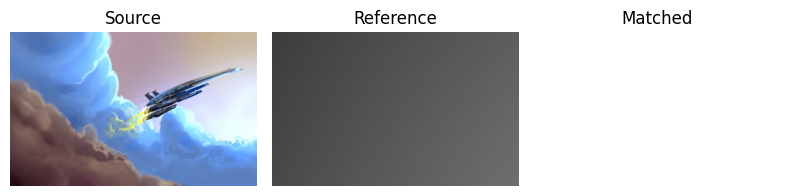

C:\Users\hpary\AppData\Local\Temp\ipykernel_14532\1542680310.py:47: RuntimeWarning: invalid value encountered in divide
  axes[c, i].plot(bins, img_hist / img_hist.max())


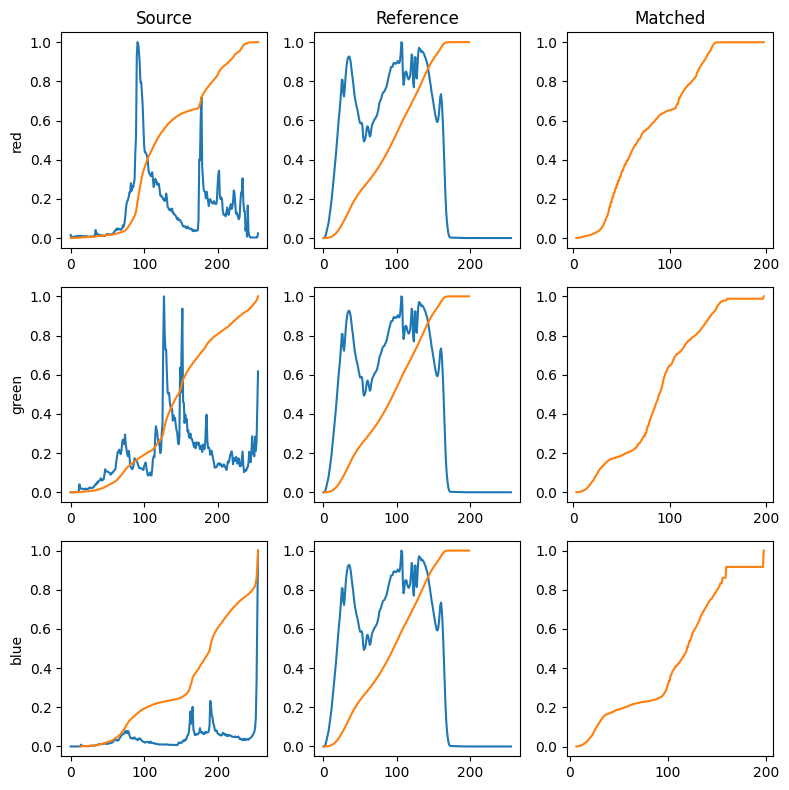

In [90]:
from skimage import exposure 
from skimage.exposure import match_histograms 

#Match the histogram of image spaceship with cathedral
# reading main image
img1 = cv2.imread(path)

# checking the number of channels
print('No of Channel is: ' + str(img1.ndim))

# reading reference image
img2 = cv2.imread(r"images\low contrast.jpg")

# checking the number of channels
print('No of Channel is: ' + str(img2.ndim))

image = img1
reference = img2


matched = match_histograms(image, reference)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                                    figsize=(8, 3),
                                    sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c],
                                            source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

## Histogram Matching - Example 2
#### Match the historgram of image woods with lena

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of Channel is: 3
No of Channel is: 3


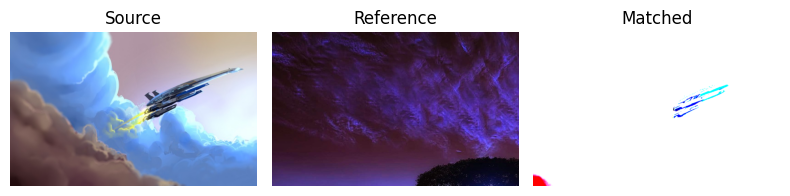

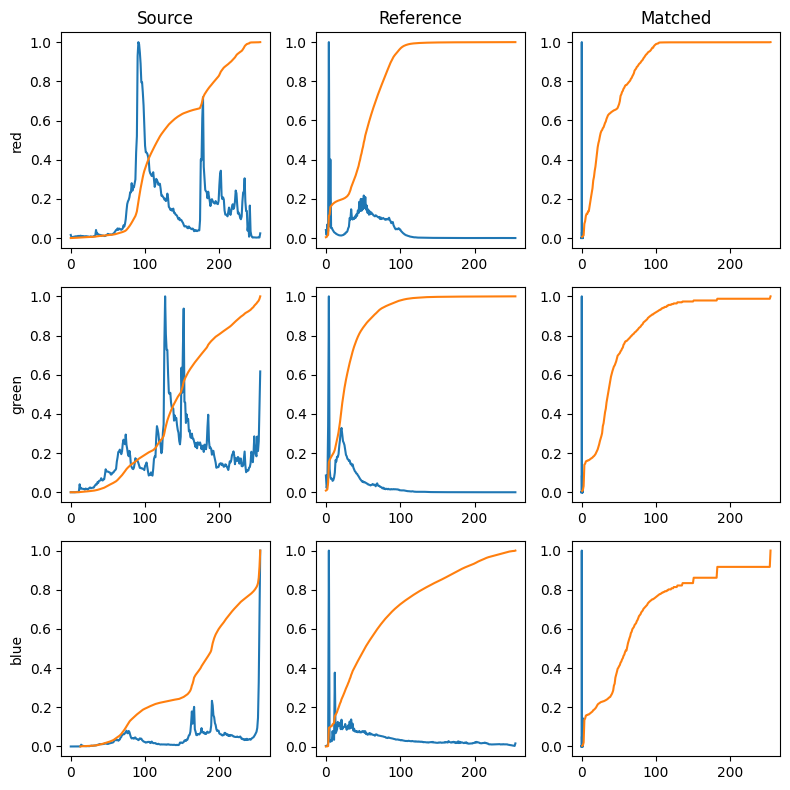

In [91]:
#Match the historgram of image woods with lena

# reading main image
img1 = cv2.imread(path)

# checking the number of channels
print('No of Channel is: ' + str(img1.ndim))

# reading reference image
img2 = cv2.imread(r"images\tree.jpg")

# checking the number of channels
print('No of Channel is: ' + str(img2.ndim))

image = img1
reference = img2

matched = match_histograms(image, reference)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c],
                                            source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

# Plot gray-scale normalised histogram

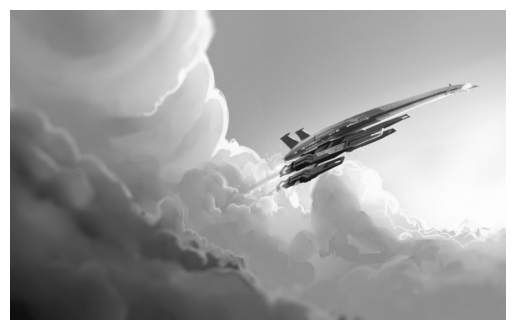

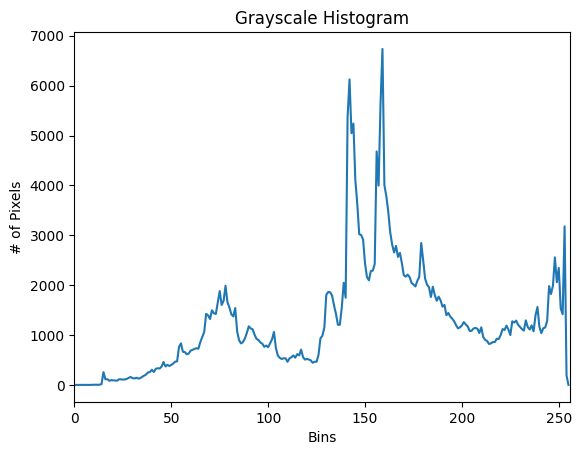

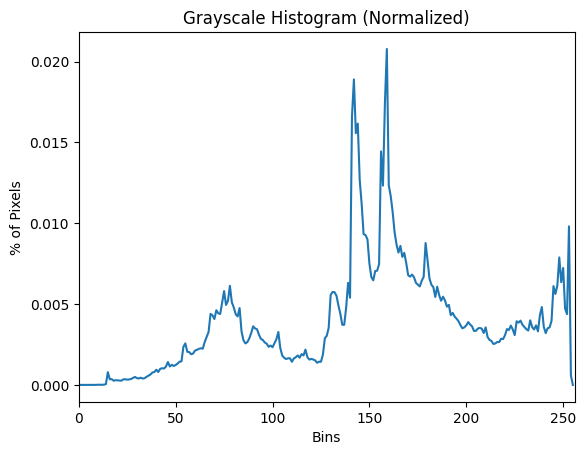

In [92]:
from matplotlib import pyplot as plt
import cv2

# load the input image and convert it to grayscale
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# normalize the histogram
hist = hist/hist.sum()

# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

Histogram Stretching

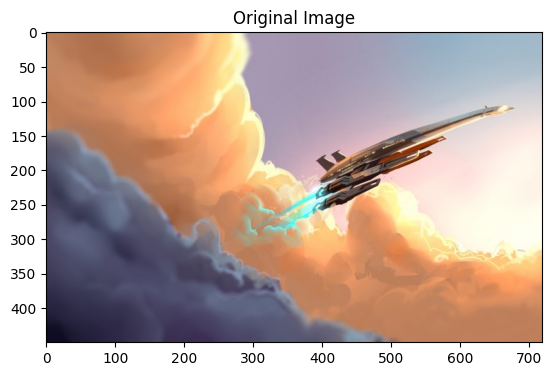

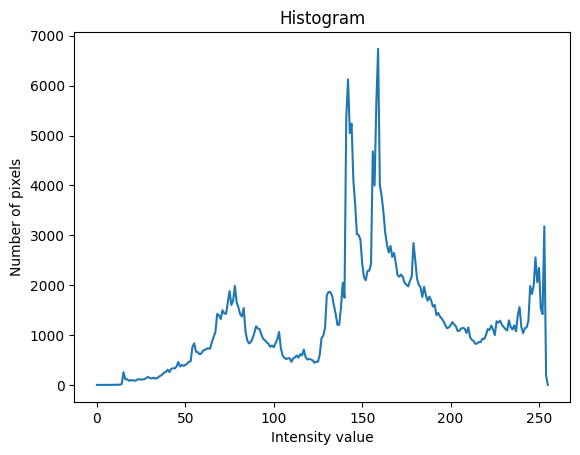

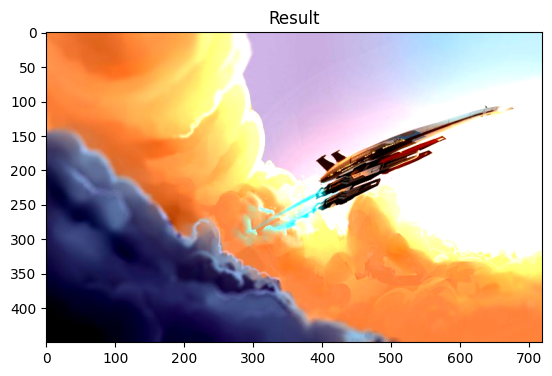

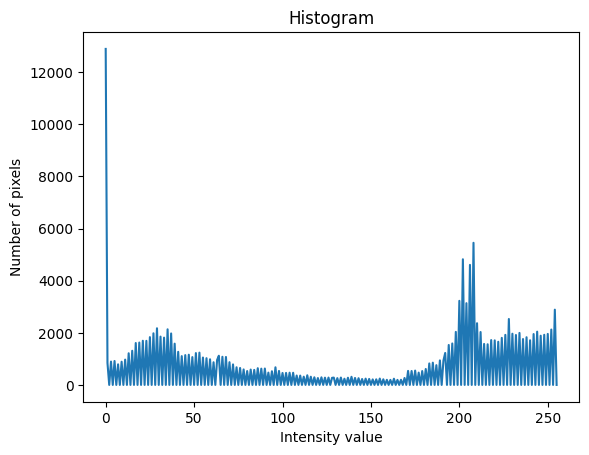

In [93]:

#should be grayscale img here i think

def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2



 # reads an input image
img = cv2.imread(path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img.astype('uint8'))
plt.title('Original Image')
plt.show()

# find frequency of pixels in range 0-255
histr1 = cv2.calcHist([gray],[0],None,[256],[0,255])

# show the plotting graph of an image
plt.plot(histr1)
plt.xlabel('Intensity value')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

# Define parameters.
r1 = 60
r2 = 190

s1 = 0
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
# Apply contrast stretching.
linear_stretched = pixelVal_vec(img, r1, s1, r2, s2)

plt.imshow(linear_stretched.astype('uint8'))
plt.title('Result')
plt.show()

# find frequency of pixels in range 0-255
histr2 = cv2.calcHist([linear_stretched.astype(np.float32)],[0],None,[256],[0,255])

# show the plotting graph of an image
plt.plot(histr2)
plt.xlabel('Intensity value')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()